In [2]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
# =============================================================================
# Read Data
# =============================================================================
batch_size = 50

train_dataset = datasets.MNIST(root='./mnist_data/',train=True,transform=transforms.ToTensor(),download=True)

test_dataset = datasets.MNIST(root='./mnist_data/',train=False,transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

/home/dominic/yes/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


Train Epoch: 1 Loss:2.0720980167388916
Train Epoch: 2 Loss:1.7686059474945068
Train Epoch: 3 Loss:1.789920687675476
Train Epoch: 4 Loss:1.646939992904663
Train Epoch: 5 Loss:1.7213809490203857
Train Epoch: 6 Loss:1.5717926025390625
Train Epoch: 7 Loss:1.561580777168274
Train Epoch: 8 Loss:1.5539615154266357
Train Epoch: 9 Loss:1.5905861854553223


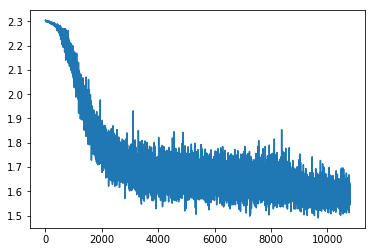

In [3]:
# =============================================================================
# Define Model
# =============================================================================
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(784, 300)
        self.linear2 = nn.Linear(300, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x=F.relu(self.linear1(x))
        return F.softmax(self.linear2(x))


model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
arLoss=[]
for epoch in range(1, 10):
    model.train()
    for index, (x, y) in enumerate(train_loader):
        x, y = Variable(x), Variable(y)        
        y_pred = model(x)
        loss = criterion(y_pred, y)
        arLoss.append(loss.data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Train Epoch: {} Loss:{}'.format(epoch, loss.data))
plt.plot(arLoss)